## APP

In [190]:
library(data.table)
library(dplyr)
library(magrittr)
library(ggplot2)
library(ggrepel)
library(cowplot)
library(tidyverse)

## Data loading

In [279]:
#effect_table_snatac =  read_delim("/data/analysis_result/snatac_fsusie/top_loci/ROSMAP_Kelis_snatac_fsusie.exported.toploci.bed.gz") # This is what should be loaded while at the moment I loaded the copy in my local folder first. 
effect_table_snatac =  read_delim("/data/interactive_analysis/hs3163/output_file/ROSMAP_Kelis_snatac_fsusie.exported.toploci.bed.gz") # This is what should be loaded while at the moment I loaded the copy in my local folder first. 


Rows: 554 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (13): #chr, a1, a2, variant_ID, event_ID, region_ID, cs_id, cs_root, epi...
dbl  (8): start, end, TADB_start, TADB_end, maf, PIP, cs_coverage_0.95, grid...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [210]:
effect_table_snatac_app = effect_table_snatac%>%filter(region_ID == "chr21_21882581_26518865")

In [211]:
effect_table_snatac_app$cs_id


[1] "ROSMAP_snATAC_Kelis_Ast:chr21_21882581_26518865:2"

In [194]:

source("/data/interactive_analysis/hs3163/snatac_case_study/fsusie-experiments/scripts_plot/cases_study/get_gene_annotations.R")
source("/data/interactive_analysis/hs3163/snatac_case_study/fsusie-experiments/scripts_plot/cases_study/interpolate_effect_estimates.R")
gene_file <-
  file.path("/home/ubuntu/data/resource/references/Homo_sapiens.GRCh38.103.chr.reformatted.collapse_only.gene.ERCC.gtf")
genes <- get_gene_annotations(gene_file)

eQTL_1 = readRDS("~/data/analysis_result/finemapping_twas/susie_twas/ROSMAP_DeJager_eQTL.ENSG00000142192.univariate_susie_twas_weights.rds") # These two rds is required to load the marginal sumstat for the null snps
GWAS_1 = readRDS("/data/interactive_analysis/hs3163/snatac_case_study/RSS_QC_RAISS_imputed.chr21_24215031_26405838.univariate_susie_rss.rds") # These two rds is required to load the marginal sumstat for the null snps

key_marker = 26171790
pos0 = 25500000
pos1  = 26405838

In [195]:
diff_cor = readRDS("/data/interactive_analysis/hs3163/snatac_case_study/APP_snatac_case_study.homo_alt_vs_homo_ref.diff_in_cor.rds")


In [285]:
p6dat = read_delim("/data/interactive_analysis/hs3163/snatac_case_study/Astro.chr21_21882581_26518865.fsusie_mixture_normal_none__top_pc_weights.raw_input.tsv")
# compute diff_mat as you have
diff_mat <- p6dat %>% filter(genotype == 2) %>% 
  select(`25386103`:`26469950`) %>% 
  cor(use = "pairwise.complete.obs") -
  p6dat %>% filter(genotype == 0) %>% 
  select(`25386103`:`26469950`) %>% 
  cor(use = "pairwise.complete.obs")

# get matrix indices where diff > 0.8
idx <- which
(diff_mat > -3, arr.ind = TRUE)

# assemble a data.frame of row/col names + value
diff_cor <- data.frame(
  row = rownames(diff_mat)[idx[,1]],
  col = colnames(diff_mat)[idx[,2]],
  diff = diff_mat[idx]
)



Rows: 68 Columns: 46
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): sample
dbl (45): 21969345, 22254003, 22343124, 24045583, 24046115, 24436483, 249394...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [196]:
(eQTL_1$ENSG00000142192$Ast_DeJager_eQTL$top_loci)%>%filter(str_detect(variant_id,"26171790"))

variant_id,betahat,sebetahat,maf,pip,cs_coverage_0.95,cs_coverage_0.7,cs_coverage_0.5
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr21:26171790:A:G,0.191449,0.03906881,0.4379475,0.01346267,1,0,0


## Annotate the peaks

In [197]:
snatac_cood = read_delim("/data/interactive_analysis/hs3163/output_file/snatac_coord.tsv")

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 756888 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): #chr, ID
dbl (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [198]:
remap_ast = read_delim("/data/interactive_analysis/hs3163//external_data/remap2022_astrocyte_nr_macs2_hg38_v1_0.bed.gz", col_names = F)

Rows: 76945 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): X1, X4, X6
dbl (5): X2, X3, X5, X7, X8
num (1): X9

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [199]:
remap_ast = remap_ast%>%filter(X1 == "chr21"  )

In [200]:
remap_ast%>%filter(X2 > pos0 , X3 < pos1 )%>%separate_rows(X4,sep = ":")%>%filter(!str_detect(X4,","))%>%head

X1,X2,X3,X4,X5,X6,X7,X8,X9
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
chr21,25507594,25507840,CTCF,146,.,25507721,25507722,25214056
chr21,25562036,25562434,CTCF,297,.,25562218,25562219,25214056
chr21,25606771,25606934,CTCF,1,.,25606832,25606833,25214056
chr21,25606771,25606934,astrocyte,1,.,25606832,25606833,25214056
chr21,25607426,25607791,CTCF,526,.,25607603,25607604,25214056
chr21,25608203,25608646,CTCF,588,.,25608443,25608444,25214056


## Data preparation

In [201]:
# ─────────────────────────────────────────────
# SECTION 1: GWAS
# ─────────────────────────────────────────────
GWAS_1 = (GWAS_1[[1]][[2]])%>%select(variant_id,pos,beta,se,z,pval = pvalue )%>%
                                mutate(CS = variant_id %in%  
((GWAS_1[[1]][[1]][["top_loci"]])%>%filter(cs_coverage_0.95 != 0)%>%pull(variant_id))  )%>%
mutate(variant_id = paste0("chr",variant_id ))%>%mutate( id = ifelse(CS != 0, variant_id,NA))

# ─────────────────────────────────────────────
# SECTION 2: eQTL
# ─────────────────────────────────────────────
eQTL_pdat_1 = tibble(
variant_id = eQTL_1[[1]][["Ast_DeJager_eQTL"]][["variant_names"]],
beta = eQTL_1[[1]][["Ast_DeJager_eQTL"]][["sumstats"]][[1]],
se = eQTL_1[[1]][["Ast_DeJager_eQTL"]][["sumstats"]][[2]])%>%mutate(z  = beta/se, CS = variant_id %in% 
((eQTL_1[[1]][["Ast_DeJager_eQTL"]][["top_loci"]])%>%filter(cs_coverage_0.95 == 1 )%>%pull(variant_id)) 
)%>%separate(variant_id,into = c("chr","pos"),remove = F)%>%mutate(pos = as.numeric(pos), id = ifelse(CS != 0, variant_id,NA) )%>%
mutate(pval = 2 * pnorm(-abs(z)))




Warning message:
“Expected 2 pieces. Additional pieces discarded in 11374 rows [1, 2, 3, 4, 5, 6,
7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


In [212]:



# ─────────────────────────────────────────────
# SECTION 4: PANEL 3 – mSNP PIP fine-mapping
# ─────────────────────────────────────────────
pdat3 <- data.frame(
  id  = effect_table_snatac_app$variant_ID,
  pos = effect_table_snatac_app$end,
  pip = effect_table_snatac_app$PIP,
  cs  = effect_table_snatac_app$cs_coverage_0.95,
  stringsAsFactors=FALSE
)
rownames(pdat3) = pdat3$id

pdat4 <- effect_table_snatac_app%>%select(pos	= epi_mark_positions,effect = epi_mark_effects)%>%
separate_rows(pos,effect,sep = ";")%>%mutate_all(as.numeric)

pdat5 <- genes %>%
  filter(chromosome=="chr21", end>pos0, start<pos1) %>%
  mutate(
    start = start,
    end   = end,
    tss   = ifelse(strand=="+", start, end),
    y     = seq(0,1,length.out=n())
  )

### Setup the data for the loop plot

In [224]:
library(data.table)



# convert to data.tables
setDT(remap_ast); setDT(pdat4)

# if your effect table lacks a chr column, add it (here all on chr21)
pdat4[, X1 := remap_ast$X1[1]]

# define the same interval columns in both tables
remap_ast[,   `:=`(start = X2,      end = X3)]
pdat4[, `:=`(start = pos,      end = pos)]

# key both tables on chr, start, end
setkey(remap_ast,   X1, start, end)
setkey(pdat4,  X1, start, end)

# find points (pos) within ranges [X2,X3]
res <- foverlaps(pdat4, remap_ast, type = "within", nomatch = 0L)


In [225]:
cre = res %>%
  separate(X4, into = c("target","biotype"), sep = "\\:") 

In [258]:
# 1) define a y‐position for the arcs just below the SNATAC effects
y_arc <- 0.1

# 2) set a diff threshold to filter which arcs to draw
diff_thresh <- 0.8

# 3) prepare the arc data.frame, filtering by diff and flipping curvature

df3 <- diff_cor %>%
  filter(abs(diff) > diff_thresh) %>%
  mutate(
    x    = as.numeric(row),
    xend = as.numeric(col)
  ) %>%
  left_join(pdat4 %>% select(pos, effect), by = c("x" = "pos")) %>%
  rename(y = effect) %>%
  left_join(pdat4 %>% select(pos, effect), by = c("xend" = "pos")) %>%
  rename(yend = effect) %>%
  mutate(curvature = (coord_diff / max(coord_diff, na.rm = TRUE)) * 0.8) %>%
  filter(x < xend)#%>%filter(row %in% cre$pos  |  col %in% cre$pos )
df4 = df3 %>% filter(row %in% cre$pos  | col %in% cre$pos )

## Plotting 

In [175]:
p1 <- ggplot(GWAS_1, aes(x = pos, y = -log10(as.numeric(pval))*sign(z), col=CS,label = id)) +
  geom_point(size=1) +  geom_point(size=1, data = GWAS_1%>%filter(str_detect(variant_id,"25828851" )),color = "red") +
  geom_vline(xintercept=key_marker, linetype="dotted", color="darkgray") +
  geom_text_repel(size=5, color="dimgray", segment.color="dimgray",data = GWAS_1%>%filter(id == "chr21:26171790:A:G"),
                  min.segment.length=0, max.overlaps=Inf) +
  scale_color_manual(values=c("black","dodgerblue")) +
  scale_x_continuous(limits=c(pos0,pos1)) +
  labs(x="", y="signed -log10(pval) for AD") + theme_cowplot(font_size = 9) 

Warning message:
“Removed 6153 rows containing missing values or values outside the scale range
(`geom_point()`).”


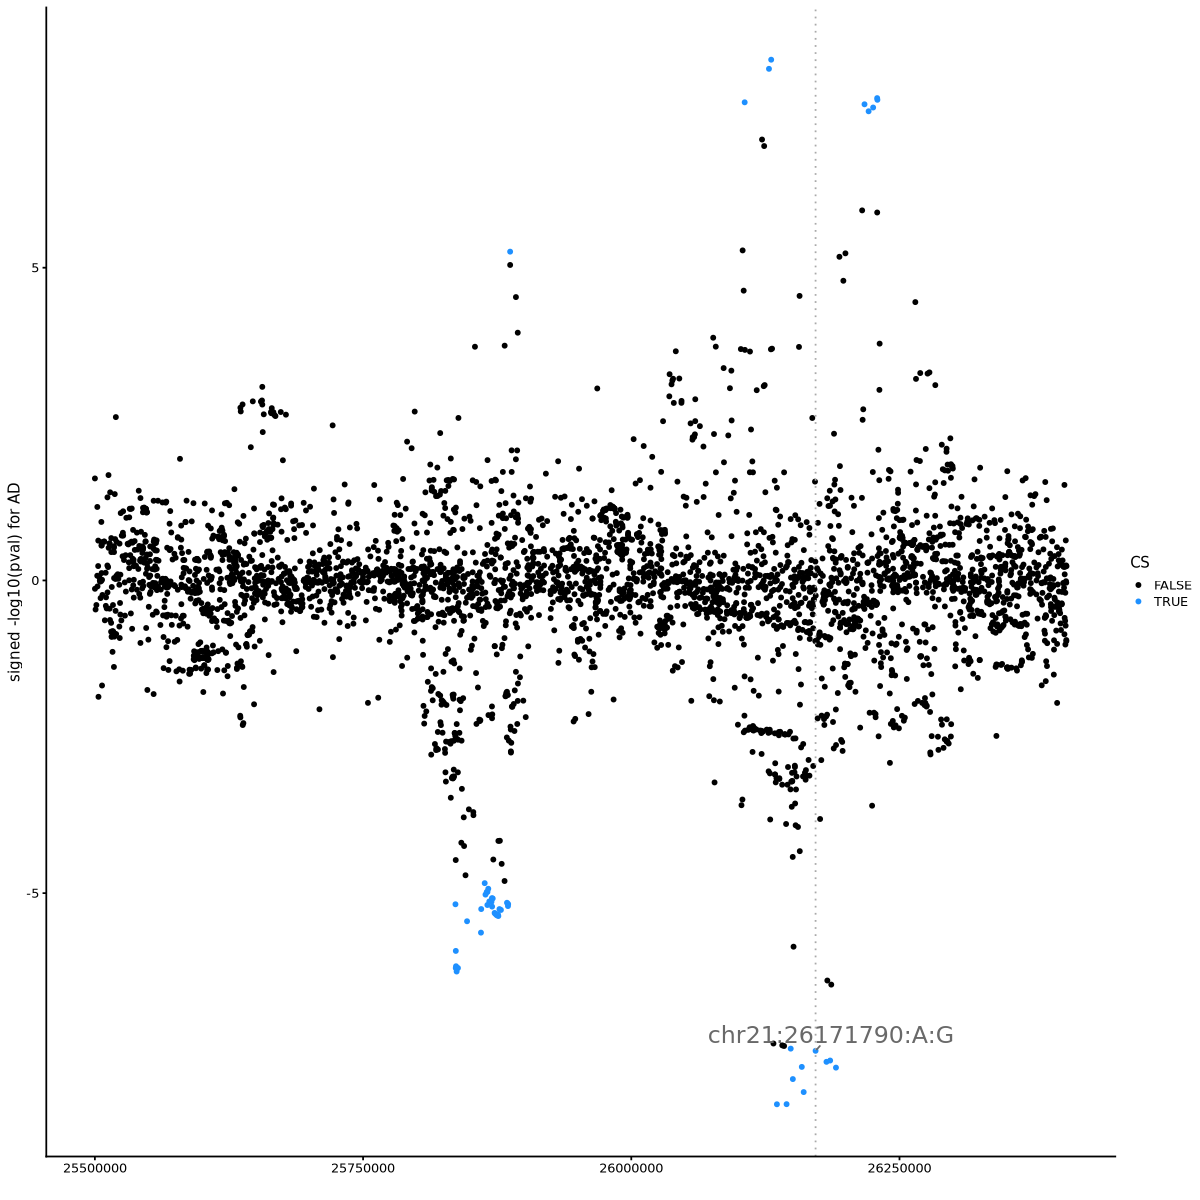

In [176]:
p1

In [177]:
p2 <- ggplot(eQTL_pdat_1, aes(x = pos, y = -log10(as.numeric(pval))*sign(z), col=CS,label = id)) +
  geom_point(size=1) +
  geom_vline(xintercept=key_marker, linetype="dotted", color="darkgray") +
  geom_text_repel(size=5, color="dimgray", segment.color="dimgray",data = eQTL_pdat_1%>%filter(id == "chr21:26171790:A:G"),
                  min.segment.length=0, max.overlaps=Inf) +
  scale_color_manual(values=c("black","dodgerblue")) +
  scale_x_continuous(limits=c(pos0,pos1)) +
  labs(x="", y="signed -log10(pval) for eQTL") + theme_cowplot(font_size = 9) 

Warning message:
“Removed 7068 rows containing missing values or values outside the scale range
(`geom_point()`).”


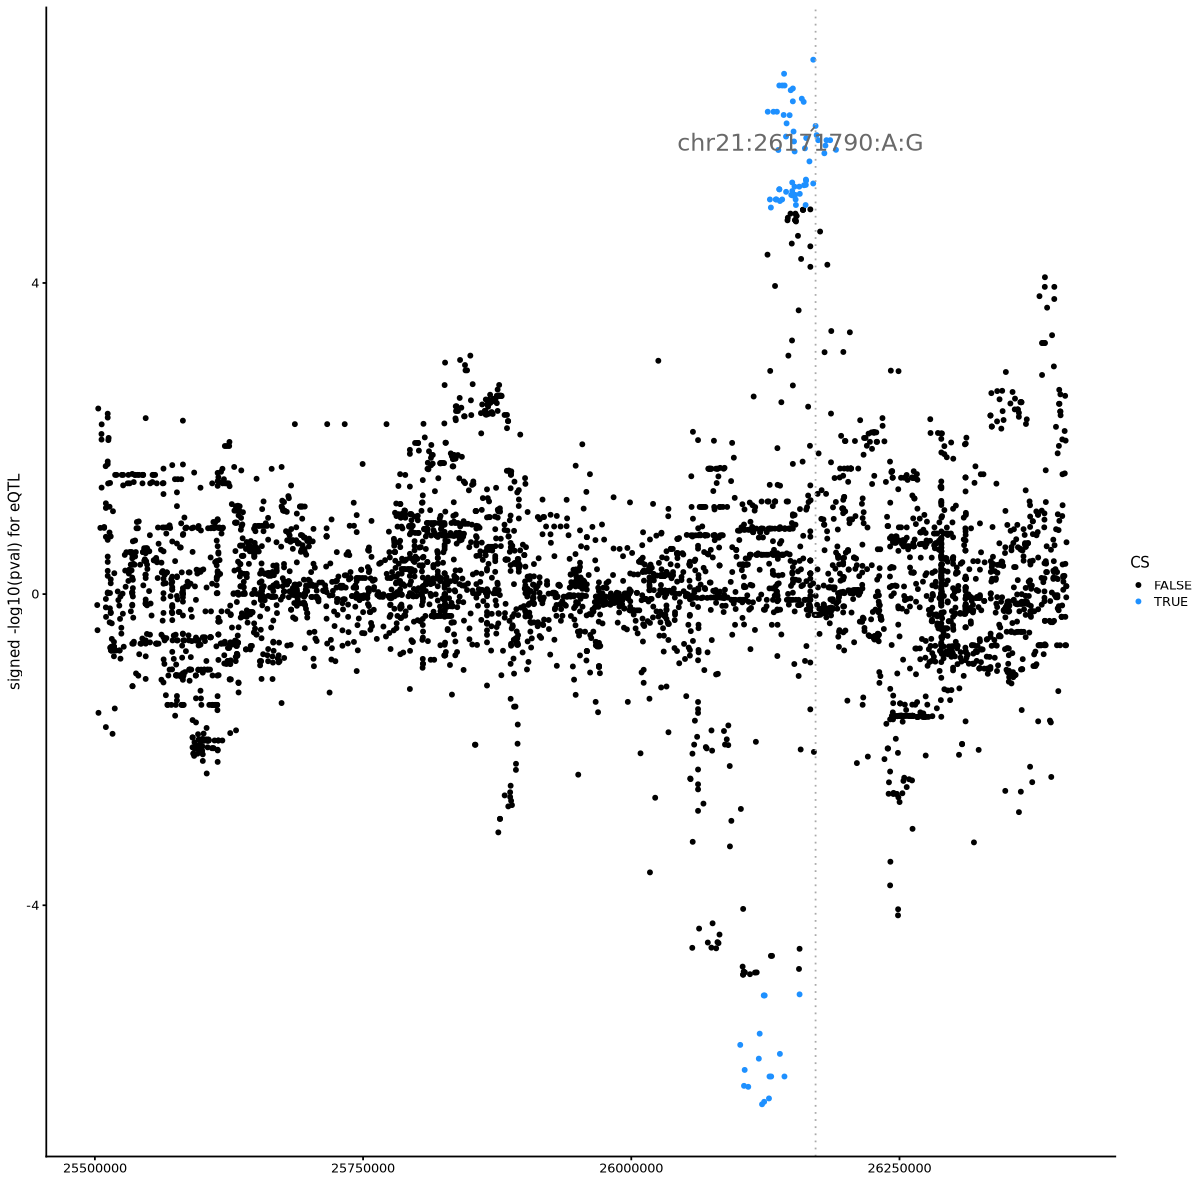

In [178]:
p2

In [179]:
p3 <- ggplot(pdat3, aes(pos, pip,label=id)) +
  geom_point(size=0.75,color = "dodgerblue") +
  geom_vline(xintercept=key_marker, linetype="dotted", color="darkgray") +
  geom_text_repel(size=5, color="dimgray", segment.color="dimgray",
                  min.segment.length=0, max.overlaps=Inf) +
  scale_x_continuous(limits=c(pos0,pos1)) +
  labs(x="", y="ca-SNP PIP") +
  theme_cowplot(font_size=9)


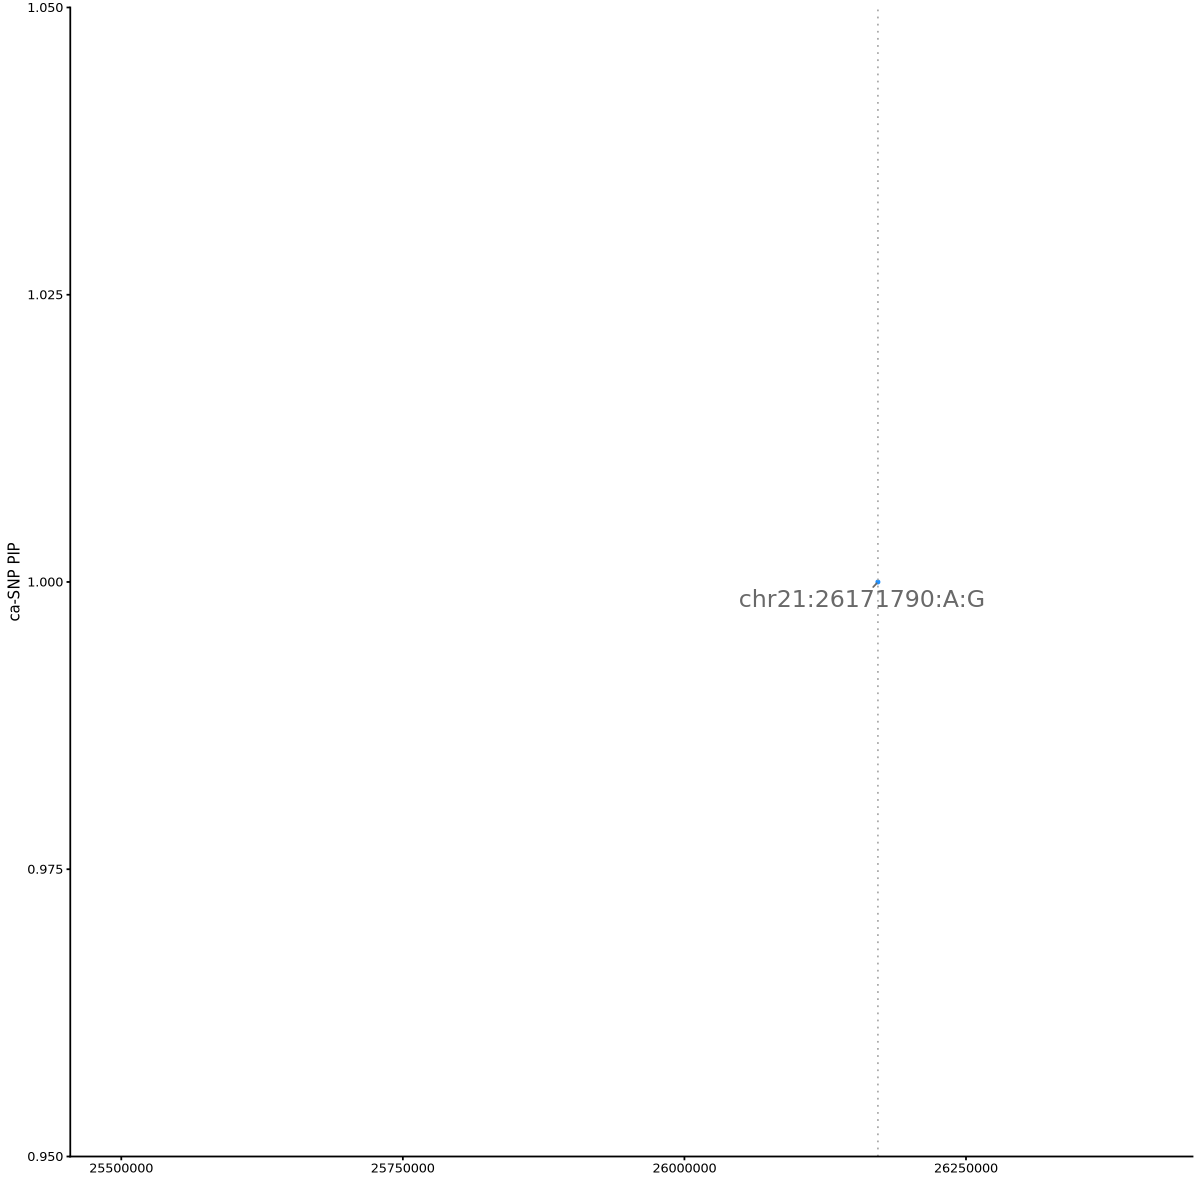

In [180]:
p3

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
“Removed 8 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_curve()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_curve()`).”


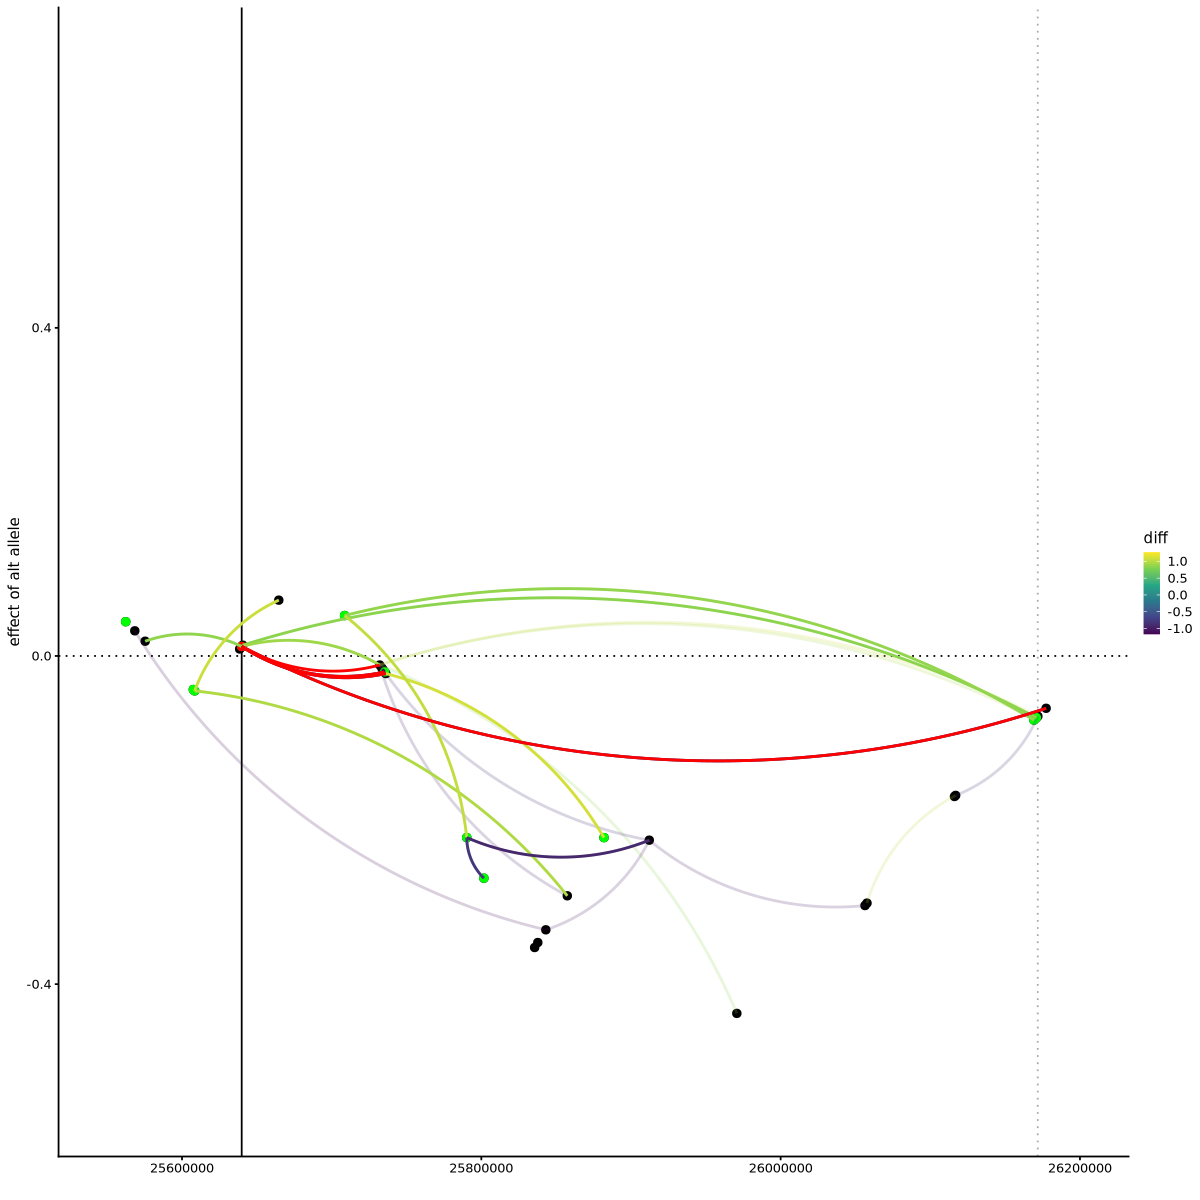

In [274]:
# ─────────────────────────────────────────────
# SECTION 5: PANEL 4 – SNATAC effect estimates
# ─────────────────────────────────────────────


 library(dplyr)
library(ggplot2)
library(cowplot)


curv = 0.2
# 4) combined plot
p4  = ggplot() +
  # — SNATAC effect estimates (panel 4) —
  geom_hline(yintercept = 0, linetype = "dotted") +
  geom_point(
    data = subset(pdat4),
    aes(x = pos, y = effect), size = 2
  )  +geom_vline(aes(xintercept = 25639873 ) )+
  geom_vline(xintercept = key_marker, linetype = "dotted", color = "darkgray") +
   geom_point(size = 2,aes( y = effect, x = pos),color = "green",data = cre%>%filter(str_detect(target , "CTCF") ) ) +
   geom_point(size = 2,aes( y = effect, x = pos),color = "red",data = cre%>%filter(str_detect(target , "EZH2") ) ) +

  # — co‐accessibility arcs on top —
  # — co‐accessibility arcs on top —
  geom_curve(
    data      = df3%>%filter(diff > 0),
    aes(
      x         = x,    y    = y,
      xend      = xend, yend = yend,
      color     = diff
    ),      curvature = -curv,  # negative to arc above
    ncp  = 100,alpha = 0.2,
    size = 0.8
  ) +  geom_curve(
    data      = df3%>%filter(diff <  0),
    aes(
      x         = x,    y    = y,
      xend      = xend, yend = yend,
      color     = diff
    ),      curvature = curv,  # negative to arc above
    ncp  = 100, alpha = 0.2,
    size = 0.8
  ) + geom_curve(
    data      = df4%>%filter(diff > 0),
    aes(
      x         = x,    y    = y,
      xend      = xend, yend = yend,
      color     = diff
    ),      curvature = -curv,  # negative to arc above
    ncp  = 100,
    size = 0.8
  ) +  geom_curve(
    data      = df4%>%filter(diff <  0),
    aes(
      x         = x,    y    = y,
      xend      = xend, yend = yend,
      color     = diff
    ),      curvature = curv,  # negative to arc above
    ncp  = 100,
    size = 0.8
  ) +geom_curve(
    data      = df4%>%filter(row ==  25639873),color = "red",
    aes(
      x         = x,    y    = y,
      xend      = xend, yend = yend,
      color     = diff
    ),      curvature = curv,  # negative to arc above
    ncp  = 100,
    size = 0.8
  ) +
  # — scales & theme —
  labs(x = "", y = "effect of alt allele") +
  scale_x_continuous(limits = c(pos0, pos1)) +
  scale_color_viridis_c(option = "D") +
  theme_cowplot(font_size = 9)+xlim(c(25550000,26200000))

p4

In [275]:


p5 <- ggplot(pdat5, aes(x=start, xend=end, y=y, yend=y, label=gene_name)) +
  geom_segment(color="dodgerblue", size=0.5) +
  geom_point(aes(x=tss), color="dodgerblue", shape=18, size=1.5) +
  geom_text(color="black", size=5, fontface="italic",
            hjust="right", nudge_x=-0.003) +
  geom_vline(xintercept=key_marker, linetype="dotted", color="darkgray") +
  #scale_x_continuous(limits=c(pos0,pos1)/1e6, breaks=seq(45,48,0.05)) +
  scale_x_continuous(limits=c(pos0,pos1))+  labs(x="base-pair position on chromosome 21", y="") +
  theme_cowplot(font_size=9)

In [276]:
fig <- plot_grid(p1+theme(text = element_text(size =20 )), 
                 p2+theme(text = element_text(size =20 )), 
                 p3+theme(text = element_text(size =20 )), 
                 p4+theme(text = element_text(size =20 )),
                 p5+theme(text = element_text(size =20 )), nrow=5, align="v")


Warning message:
“Removed 6153 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 7068 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 8 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_curve()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_curve()`).”


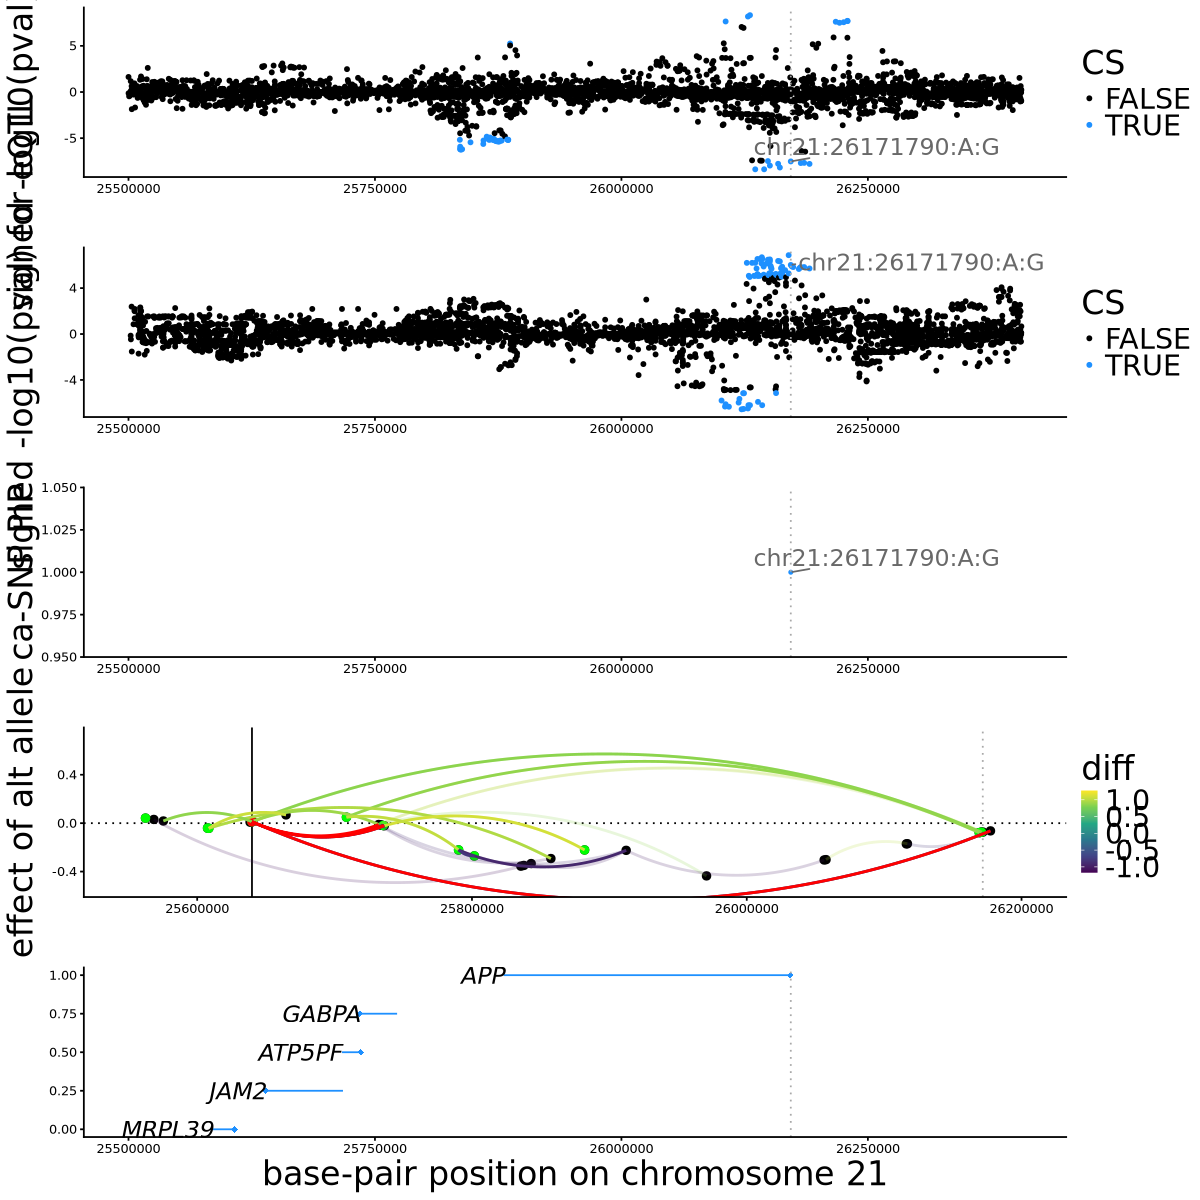

In [277]:
fig

In [269]:
options(repr.plot.width = 10, repr.plot.height = 10)

In [278]:
ggsave("APP_zoomplot.pdf",
       plot_grid(p1,p2,p3,p4,p5,nrow = 5,ncol = 1,align = "v"),
       height = 10,width = 7)

Warning message:
“Removed 6153 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 7068 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 8 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_curve()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_curve()`).”
